Import requirments (liberaries)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
from pingouin import chi2_independence 
import warnings
warnings.filterwarnings("ignore")


In [4]:
data_o = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\Breast Cancer Gene Expression.csv')
data_o.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_o[['cancer_type_detailed','cellularity']].isna().sum()

cancer_type_detailed    15
cellularity             54
dtype: int64

In [6]:
data_o[['cancer_type_detailed','cellularity']].dropna(inplace=True)

In [7]:
data_o['cancer_type_detailed'].value_counts()  

cancer_type_detailed
Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: count, dtype: int64

In [8]:
data_o['cellularity'].value_counts()

cellularity
High        939
Moderate    711
Low         200
Name: count, dtype: int64

In [9]:
expected , observed , stats = chi2_independence(data_o, x='cancer_type_detailed', y='cellularity', correction=False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,24.517572,10.0,0.006339,0.080240,0.651322
1,cressie-read,0.666667,24.311461,10.0,0.006815,0.079902,0.646715
2,log-likelihood,0.000000,24.573524,10.0,0.006215,0.080331,0.652566
3,freeman-tukey,-0.500000,NaN,10.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,10.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,10.0,NaN,NaN,NaN


In [10]:
# Filter the stats DataFrame or dictionary for the row where 'test' equals 'pearson'
P_val = stats.loc[stats['test'] == 'pearson', 'pval'].values[0]

# Check the p-value and print the result
if P_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


there is association between the 2 variables 

In [11]:
data = data_o[["patient_id", "age_at_diagnosis"]]
data.head()

,patient_id,age_at_diagnosis
0,0,75.65
1,2,43.19
2,5,48.87
3,6,47.68
4,8,76.97


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        1904 non-null   int64  
 1   age_at_diagnosis  1904 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.9 KB


In [13]:
data.describe()

,patient_id,age_at_diagnosis
count,1904.000000,1904.000000
mean,3921.982143,61.087054
std,2358.478332,12.978711
min,0.000000,21.930000
25%,896.500000,51.375000
50%,4730.500000,61.770000
75%,5536.250000,70.592500
max,7299.000000,96.290000


In [14]:
data.isna().sum()

patient_id          0
age_at_diagnosis    0
dtype: int64

In [15]:
samp = data[["patient_id", "age_at_diagnosis"]].sample(50).reset_index(drop=True)
samp.head()

,patient_id,age_at_diagnosis
0,2842,58.48
1,7028,65.94
2,124,43.46
3,6085,58.38
4,4303,66.91


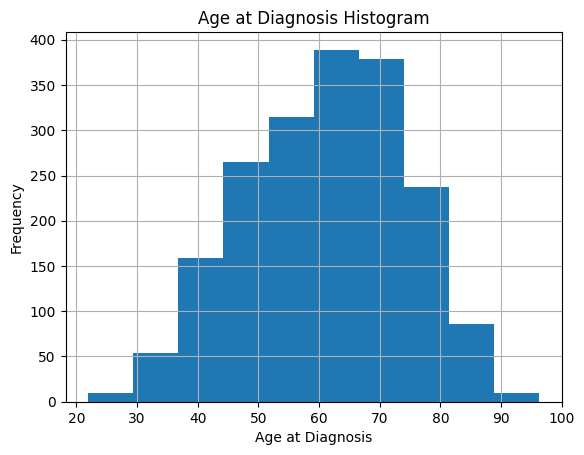

In [16]:
plt.figure()
data["age_at_diagnosis"].hist()
plt.title("Age at Diagnosis Histogram")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Frequency")
plt.savefig("age_at_diagnosis_histogram.png")

In [17]:
pop_mean = data["age_at_diagnosis"].mean()
pop_std = data["age_at_diagnosis"].std()

print(pop_mean, pop_std)

61.08705357142857 12.978711486507144


In [18]:
samp_mean = samp["age_at_diagnosis"].mean()
samp_std = samp["age_at_diagnosis"].std()       
samp_mean, samp_std

(np.float64(61.395), np.float64(12.095236581364736))

In [19]:
zscores = (samp_mean - pop_mean) / (pop_std )
zscores

np.float64(0.02372704169374435)

In [20]:
crit_z = 1.96
crit_z > zscores

np.True_

there is no significate differances between sample and population mean so we cant reject null hypothesis

In [21]:
p_value = 1 - norm.cdf(zscores)
p_value

np.float64(0.4905351679612202)

In [22]:
p_value > 0.05

np.True_

there is no significate differances between sample and population mean so we cant reject null hypothesis

In [23]:
below_50 = (50 - samp_mean ) / samp_std
below_50    

np.float64(-0.9421064171292363)

In [24]:
# Calculate the percentage below 50
percent_below = norm.cdf(below_50) * 100

# Calculate the percentage above 50
percent_above = (1 - norm.cdf(below_50)) * 100

percent_below, percent_above

(np.float64(17.306907969881646), np.float64(82.69309203011835))

which mean that the percentage of the patients below 50 years is  22.15% using z-score table 

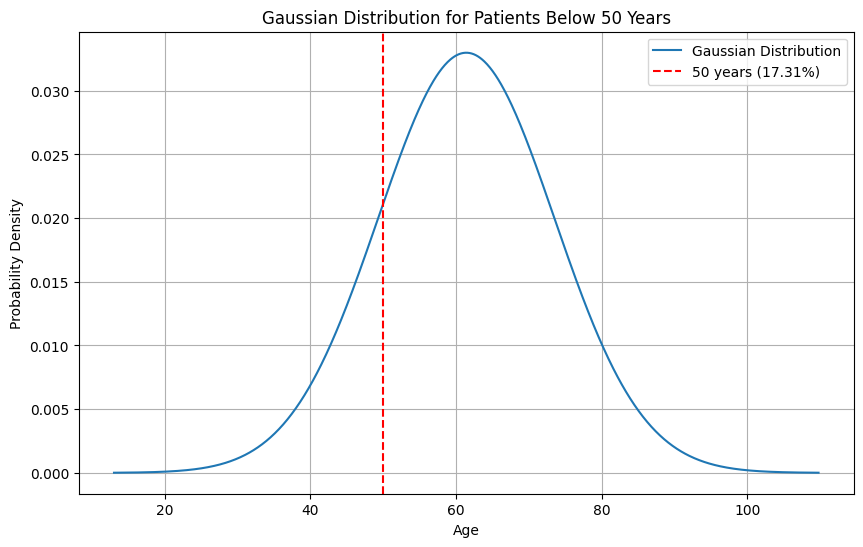

In [25]:
# Generate Gaussian distribution
mean = samp_mean
std = samp_std
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
pdf = norm.pdf(x, mean, std)

# Calculate percentage below 50 years
percent_below_50 = norm.cdf(50, mean, std) * 100

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Gaussian Distribution')
plt.axvline(50, color='red', linestyle='--', label=f'50 years ({percent_below_50:.2f}%)')
plt.title('Gaussian Distribution for Patients Below 50 Years')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

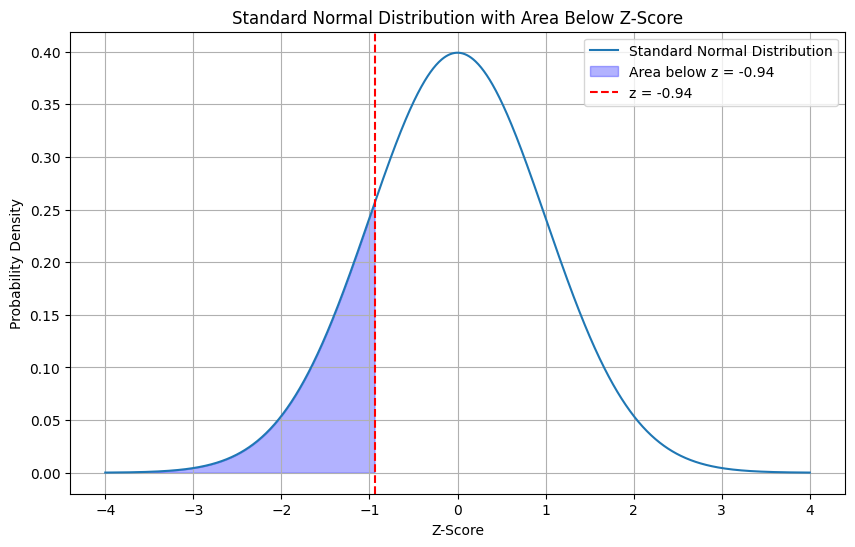

In [26]:
# Generate x values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x)

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Standard Normal Distribution')

# Highlight the area below the z-score
z = below_50  # Use the z-score for 50 years
x_fill = np.linspace(-4, z, 1000)
y_fill = norm.pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label=f'Area below z = {z:.2f}')

# Add labels and legend
plt.title('Standard Normal Distribution with Area Below Z-Score')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.axvline(z, color='red', linestyle='--', label=f'z = {z:.2f}')
plt.legend()
plt.grid()
plt.show()